# Ensemble Technique Project: Travel Package Purchase Prediction

## Problem Statement

### Context

The policymaker of a tourism company named "Visit with us" wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, and King. Looking at the data of the last year, it was observed that 18% of the customers purchased the packages. However, it was difficult to identify the potential customers because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is a package that allows the traveler to maintain, enhance, or kick-start a healthy lifestyle, and support or increase one's sense of well-being. For the launch of the new package, the company wants to harness the available data of existing and potential customers to target the right customers.

### Objective

You as a Data Scientist at "Visit with us" travel company has to analyze the customer data and information to provide recommendations to the policymaker and build a model to predict the chances of a potential customer purchasing the newly introduced travel package before the customer is contacted.

### Data Dictionary

- CustomerID: Unique customer ID
- ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
- Age: Age of customer
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
- CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3. It's the city the customer lives in. 
- DurationOfPitch: Duration of the pitch by a salesperson to the customer
- Occupation: Occupation of customer
- Gender: Gender of customer
- NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
- NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
- ProductPitched: Product pitched by the salesperson
- PreferredPropertyStar: Preferred hotel property rating by customer
- MaritalStatus: Marital status of customer
- NumberOfTrips: Average number of trips in a year by customer
- Passport: The customer has a passport or not (0: No, 1: Yes)
- PitchSatisfactionScore: Sales pitch satisfaction score
- OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
- NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
- Designation: Designation of the customer in the current organization
- MonthlyIncome: Gross monthly income of the customer

## Importing necessary libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.ensemble import StackingClassifier, RandomForestClassifier

# need SimpleImputer to impute median values
from sklearn.impute import SimpleImputer

# need openpyxl for ingest of Excel
import openpyxl
from xgboost import XGBClassifier

## Loading the dataset

In [142]:
# use pd.read_excel to read file into jupyter runbook
# may need to run !pip install openpyxl
# use sheet_name = 'Tourism' to ingest the correct sheet
tdata = pd.read_excel('datasets/Tourism.xlsx', sheet_name = 'Tourism' )

# view the first 20 rows
tdata.head(20)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


## Data Overview

In [143]:
# understand the number of rows and columns
tdata.shape

(4888, 20)

In [144]:
# Run info() to understand how many null values there are
tdata.info()

# There are 4888 rows
# Multiple columns containe null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [145]:
# Review null counts for specific columns
tdata.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [146]:
# Review some high level stats for continuous variables
tdata.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


### Initial Analysis for columns that are missing data
##### Determine whether columns that are missing data should use some form of data imputation
- Age is missing data, the mean is 37.6 and median is 36.0
- Follow up with TypeOfContract. This is a categorical value with 25 missing values
- DurationOfPitch is missing data, the mean is 15.5 and the median is 13.0
- NumberOfFollowups is missing data, the mean is 3.7 and median is 4.0
- PreferredPropertyStar is missing data, the mean is 3.6 and the median is 3.0
- NumberOfTrips is missing data, mean is 3.2 and median is 3.0
- NumberOfChildrenVisiting is missing data, mean is 1.2 and the median is 1.0

In [194]:
# Review unique values for the dependent variable
# Dependent variable is 'ProdTaken'
print(tdata['ProdTaken'].value_counts())

# ensure that train_test_split uses stratify
print(round(len(tdata[tdata['ProdTaken'] == 1]) / len(tdata), 3))

ProdTaken
0    3968
1     920
Name: count, dtype: int64
0.188


In [148]:
# Understand the number of unique values in each column
tdata.nunique()

CustomerID                  4888
ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64

In [150]:
# run loop across categorical values to understand unique values
# understand counts of unique values for each category value
for feature in tdata.columns:
    if tdata[feature].dtype == 'object':
        print(tdata[feature].value_counts())
        print(30 * '=')
        
for feature in tdata.columns:
    if tdata[feature].dtype == 'category':
        print(tdata[feature].value_counts())
        print(30 * '=')
        
# Gender has 'Fe Male' value that should be corrected to 'Female'
# Object values will need to be set as integers
# Categorical values will need to be set using get_dummies()
# Drop CustomerID

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64
Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64
Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64
ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64
MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64
Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64


## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Univariate Analysis

In [12]:
def histogram_boxplot(data, feature, figsize = (15, 10), kde = False, bins = None):
    """
    Create a function that creates two plots: histogram, boxplot
    data = dataframe
    feature = the column from the datafram
    figsize = set default to 15, 10
    kde = show density curve, set default to False
    
    
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,
        sharex = True,
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    
    )
    
    sns.boxplot(data = data, x = feature, ax = ax_box2, 
                showmeans = True, color = 'violet')
   
    
    sns.histplot(data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins
    )  if bins else sns.histplot(
            data = data, x = feature, kde = kde, ax = ax_hist2
    )
    ax_hist2.axvline(
        data[feature].mean(), color = 'green', linestyle = '--')
    ax_hist2.axvline(
        data[feature].median(), color = 'black', linestyle = '-')
    plt.show()

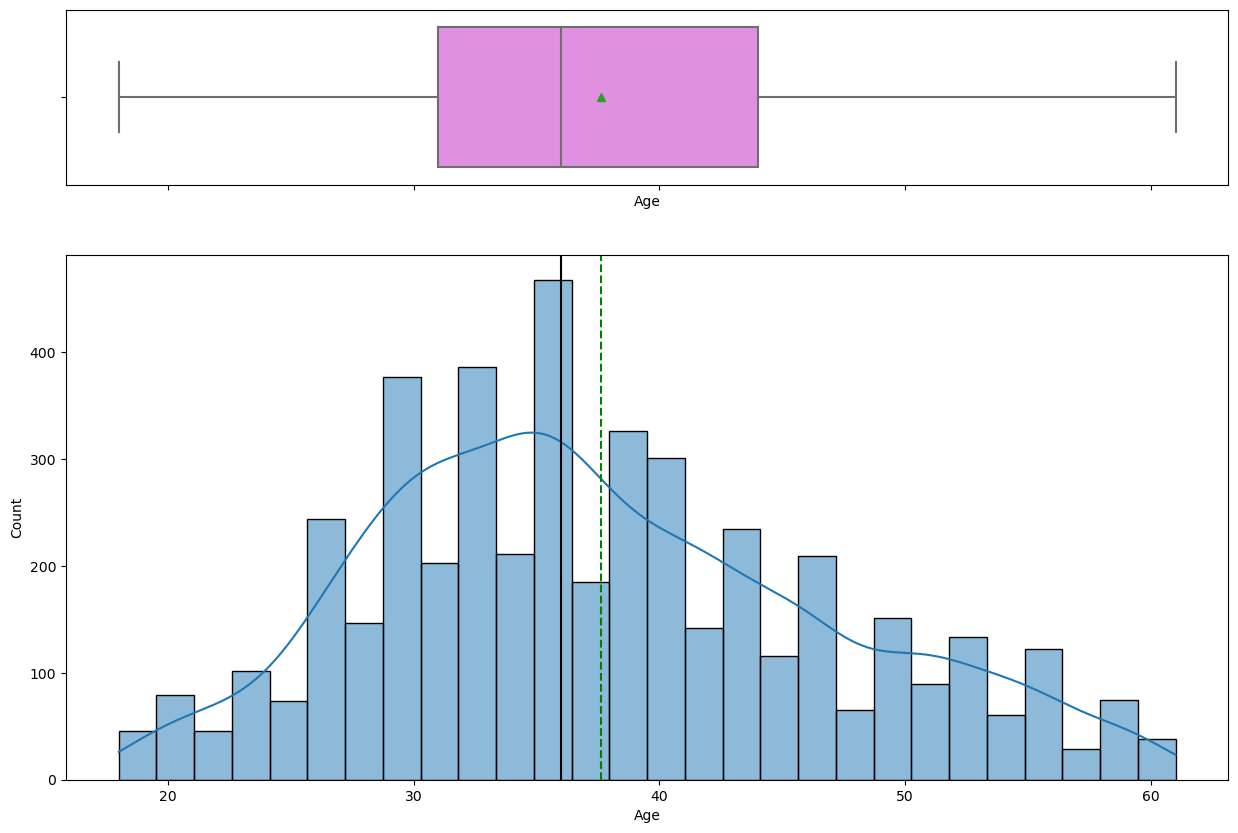

In [13]:
# run histogram_boxplot against each feature
histogram_boxplot(tdata, 'Age', kde = True)

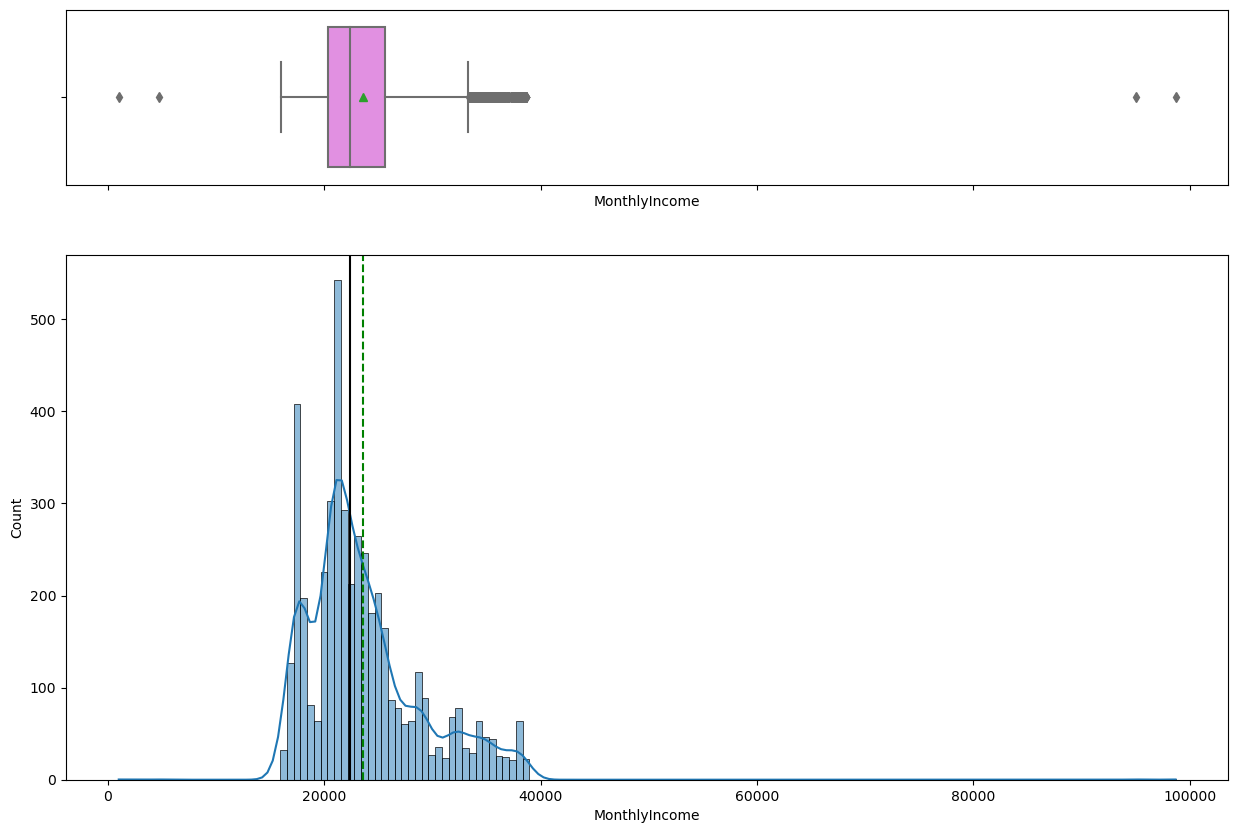

In [14]:
# run histogram_boxplot against each feature
histogram_boxplot(tdata, 'MonthlyIncome', kde = True)

In [178]:
# Top 5 largest values for MonthlyIncome
print(tdata['MonthlyIncome'].nlargest()) # Two values are clearly outliers
print(tdata['MonthlyIncome'].mean)

# Bottom 5 smallest values for MonthlyIncome
print(tdata['MonthlyIncome'].nsmallest())

2482    98678.0
38      95000.0
2634    38677.0
4104    38677.0
3190    38651.0
Name: MonthlyIncome, dtype: float64
<bound method NDFrame._add_numeric_operations.<locals>.mean of 0       20993.0
1       20130.0
2       17090.0
3       17909.0
4       18468.0
         ...   
4883    26576.0
4884    21212.0
4885    31820.0
4886    20289.0
4887    24041.0
Name: MonthlyIncome, Length: 4888, dtype: float64>
142      1000.0
2586     4678.0
513     16009.0
1983    16009.0
727     16051.0
Name: MonthlyIncome, dtype: float64


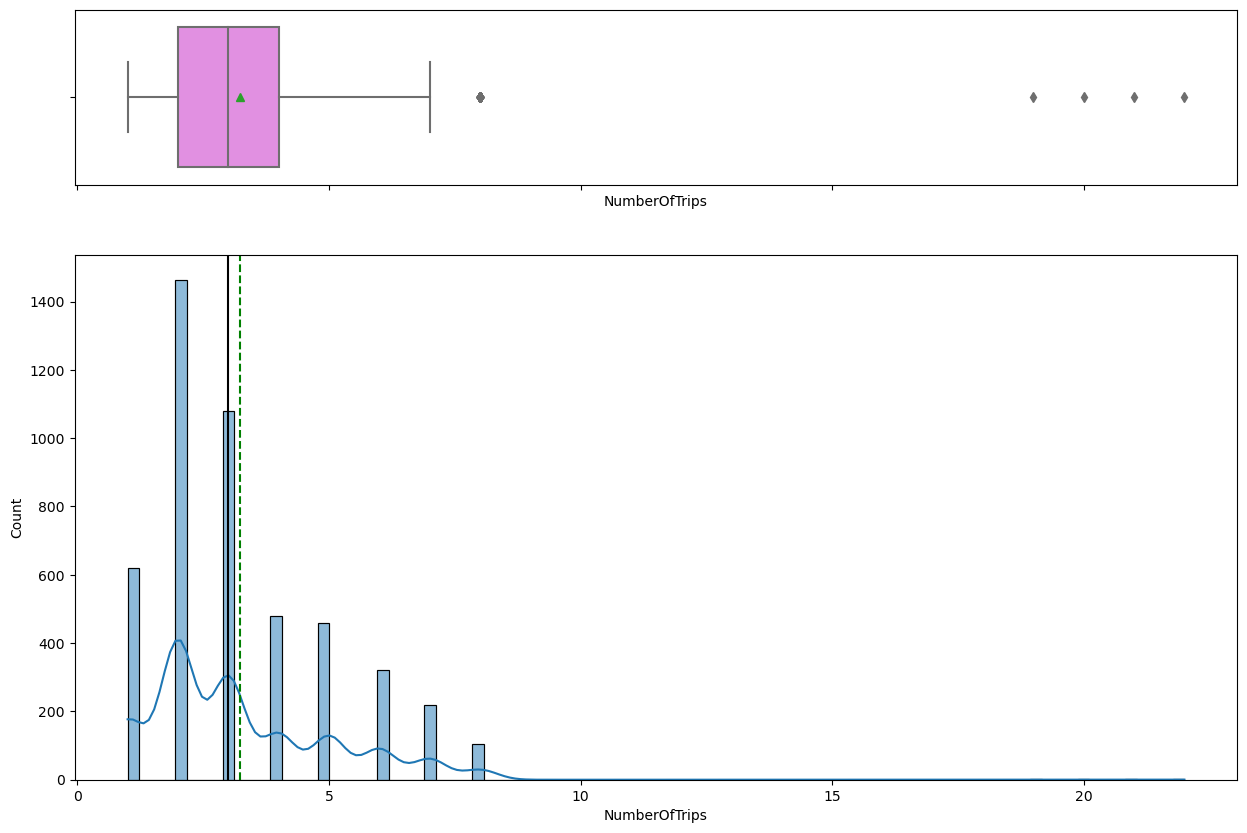

In [16]:
# run histogram_boxplot against NumberOfTrips
histogram_boxplot(tdata, 'NumberOfTrips', kde = True)

In [17]:
# Review top values for NumberOfTrips there are 4-5 outliers
tdata['NumberOfTrips'].nlargest()

3260    22.0
816     21.0
2829    20.0
385     19.0
2446     8.0
Name: NumberOfTrips, dtype: float64

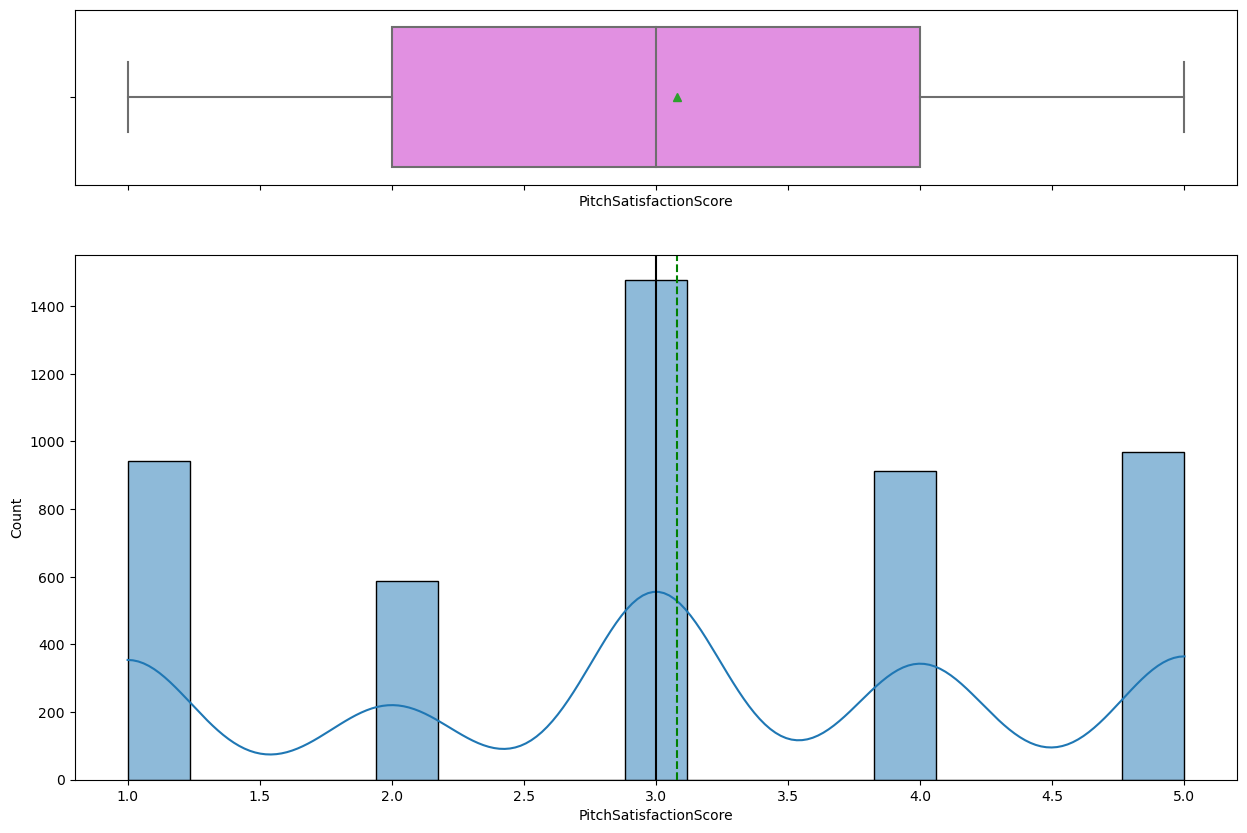

In [18]:
# run histogram_boxplot against PitchSatisfactionScore
histogram_boxplot(tdata, 'PitchSatisfactionScore', kde = True)

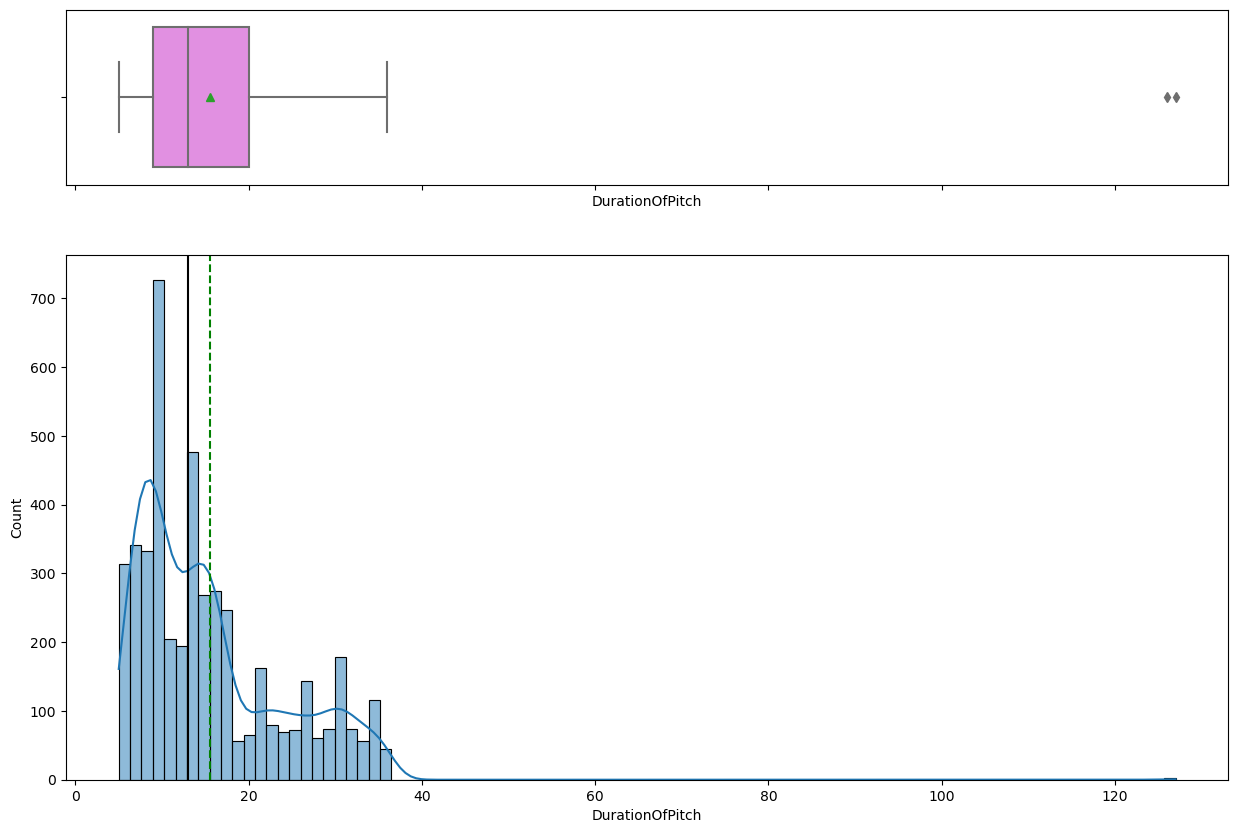

3878    127.0
1434    126.0
2505     36.0
2585     36.0
2643     36.0
Name: DurationOfPitch, dtype: float64


,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
1434,201434,0,NaN,Company Invited,3,126.0,Salaried,Male,2,3.0,Basic,3.0,Married,3.0,0,1,1,1.0,Executive,18482.0
3878,203878,0,53.0,Company Invited,3,127.0,Salaried,Male,3,4.0,Basic,3.0,Married,4.0,0,1,1,2.0,Executive,22160.0


In [19]:
# run histogram_boxplot against DurationOfPitch
histogram_boxplot(tdata, 'DurationOfPitch', kde = True)
plt.show()

# there are two outliers
print(tdata['DurationOfPitch'].nlargest())

# let's look at both outliers
tdata[tdata['DurationOfPitch'] > 100]

### Correlation Analysis

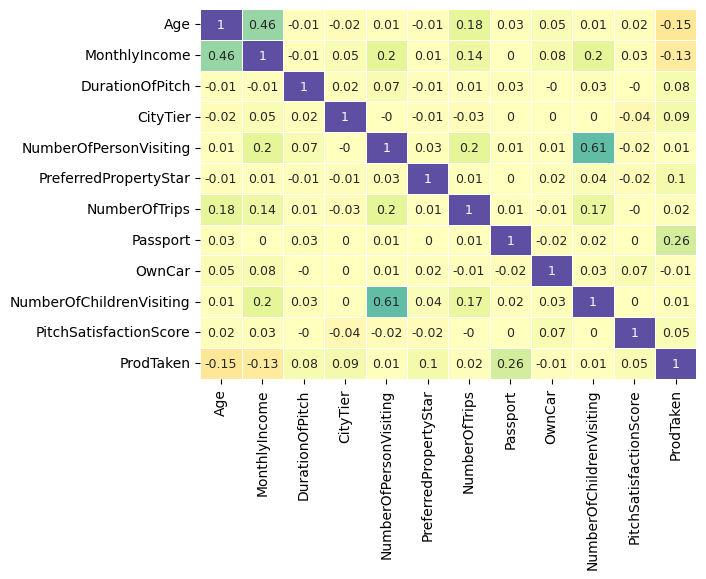

In [20]:
# Run correlations of numerical variables in the dataset

corrData = ['Age', 'MonthlyIncome', 'DurationOfPitch', 'CityTier',
           'NumberOfPersonVisiting', 'PreferredPropertyStar',
           'NumberOfTrips', 'Passport', 'OwnCar',
           'NumberOfChildrenVisiting', 'PitchSatisfactionScore', 'ProdTaken']
corr = round(tdata[corrData].corr(),2)

sns.heatmap(corr,
           vmin = -1.0,
           vmax = 1.0,
           center = 0,
           annot = True,
            linewidth = 0.5,
            cbar = False,
            cmap = 'Spectral',
           annot_kws = {'size': 9})
plt.show()

### Bivariate Analysis

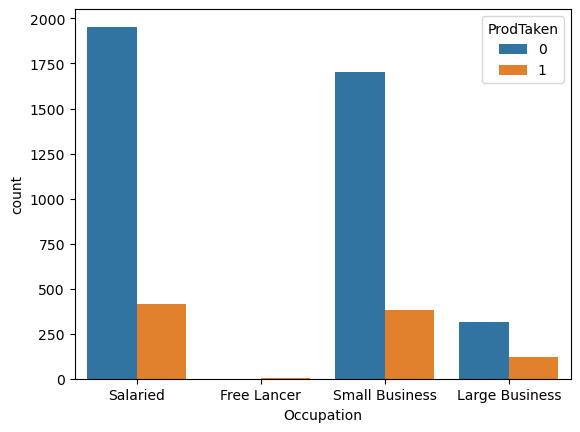

In [180]:
# Understanding customer interest based on occupation
sns.countplot(data = tdata, x = 'Occupation', hue = 'ProdTaken')
plt.show()

In [188]:
# display percentages
print("Salaried ", len(tdata[(tdata['Occupation'] == 'Salaried') & (tdata['ProdTaken'] == 1)]) / len(tdata[tdata['Occupation'] == "Salaried"]))
print("Small Business ", len(tdata[(tdata['Occupation'] == 'Small Business') & (tdata['ProdTaken'] == 1)]) / len(tdata[tdata['Occupation'] == "Small Business"]))
print("Large Business ", len(tdata[(tdata['Occupation'] == 'Large Business') & (tdata['ProdTaken'] == 1)]) / len(tdata[tdata['Occupation'] == "Large Business"]))
print("Free Lancer ", len(tdata[(tdata['Occupation'] == 'Free Lancer') & (tdata['ProdTaken'] == 1)]) / len(tdata[tdata['Occupation'] == "Free Lancer"]))




Salaried  0.17483108108108109
Small Business  0.18426103646833014
Large Business  0.2764976958525346
Free Lancer  1.0


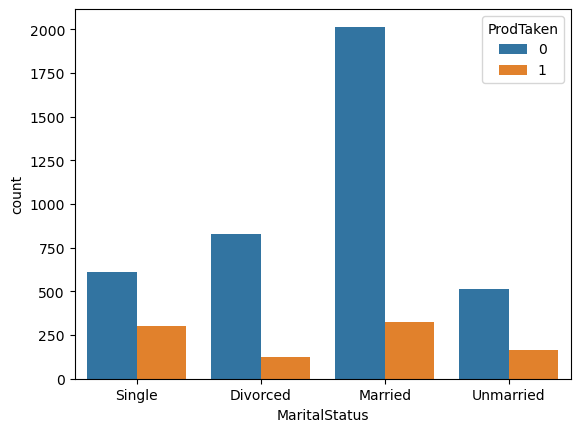

In [22]:
# Understanding customer interest based on Marital Status
sns.countplot(data = tdata, x = 'MaritalStatus', hue = 'ProdTaken')
plt.show()

In [193]:
# display percentages
print("Single", len(tdata[(tdata['MaritalStatus'] == 'Single') & (tdata['ProdTaken'] == 1)]) / len(tdata[tdata['MaritalStatus'] == "Single"]))
print("Divorced ", len(tdata[(tdata['MaritalStatus'] == 'Divorced') & (tdata['ProdTaken'] == 1)]) / len(tdata[tdata['MaritalStatus'] == "Divorced"]))
print("Married ", len(tdata[(tdata['MaritalStatus'] == 'Married') & (tdata['ProdTaken'] == 1)]) / len(tdata[tdata['MaritalStatus'] == "Married"]))
print("Unmarried ", len(tdata[(tdata['MaritalStatus'] == 'Unmarried') & (tdata['ProdTaken'] == 1)]) / len(tdata[tdata['MaritalStatus'] == "Unmarried"]))




Single 0.3318777292576419
Divorced  0.13052631578947368
Married  0.13931623931623932
Unmarried  0.2434017595307918


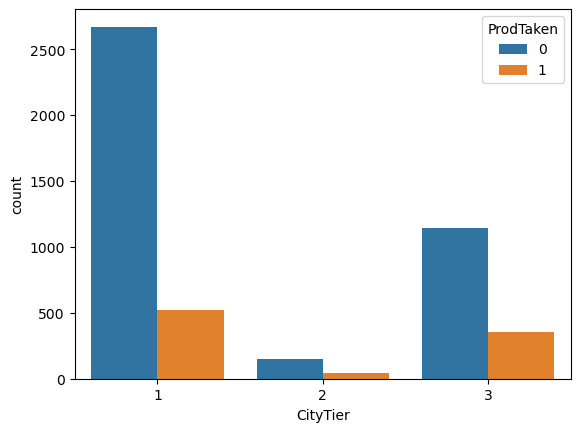

In [23]:
# Understanding customer interest based on CityTier
sns.countplot(data = tdata, x = 'CityTier', hue = 'ProdTaken')
plt.show()

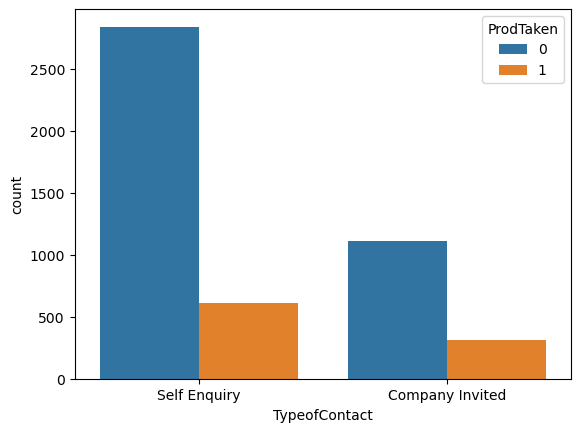

In [24]:
# Understanding customer interest based on TypeofContact
sns.countplot(data = tdata, x = 'TypeofContact', hue = 'ProdTaken')
plt.show()

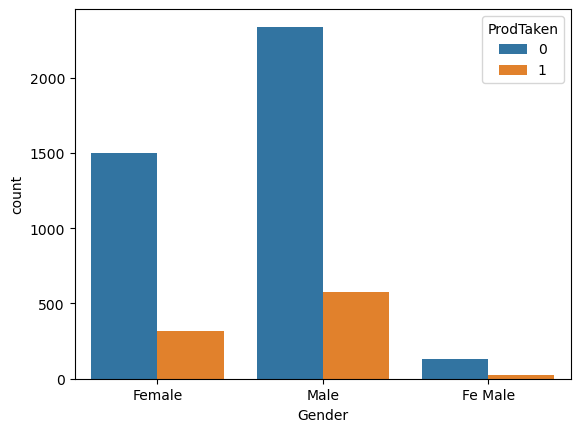

In [25]:
# Understanding customer interest based on Gender
sns.countplot(data = tdata, x = 'Gender', hue = 'ProdTaken')
plt.show()

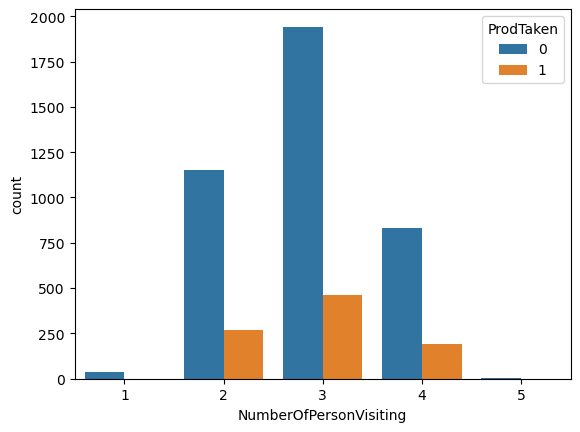

In [26]:
# Understanding customer interest based on Num People Visiting
sns.countplot(data = tdata, x = 'NumberOfPersonVisiting', hue = 'ProdTaken')
plt.show()

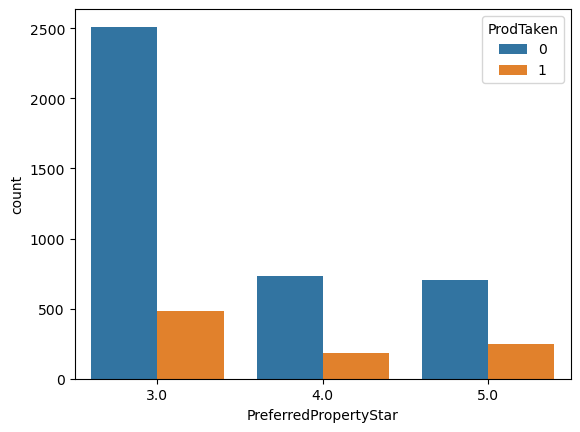

In [27]:
# Understanding customer interest based on PreferredPropertyStar
sns.countplot(data = tdata, x = 'PreferredPropertyStar', hue = 'ProdTaken')
plt.show()

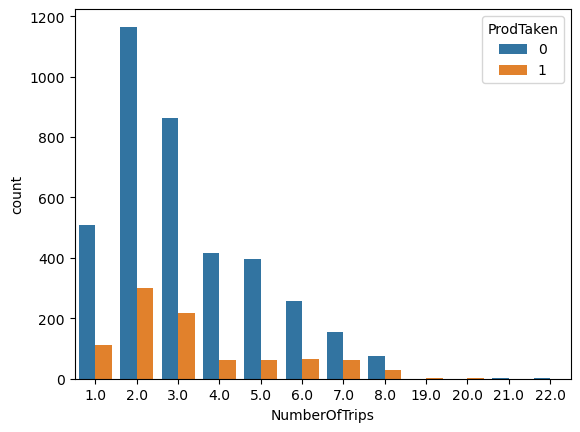

In [28]:
# Understanding customer interest based on NumberOfTrips
sns.countplot(data = tdata, x = 'NumberOfTrips', hue = 'ProdTaken')
plt.show()

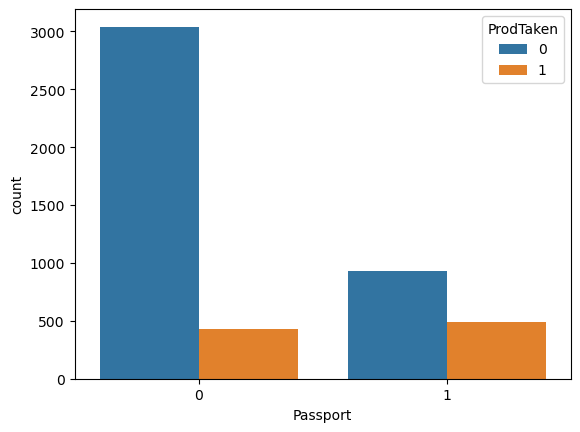

In [29]:
# Understanding customer interest based on Passport
sns.countplot(data = tdata, x = 'Passport', hue = 'ProdTaken')
plt.show()

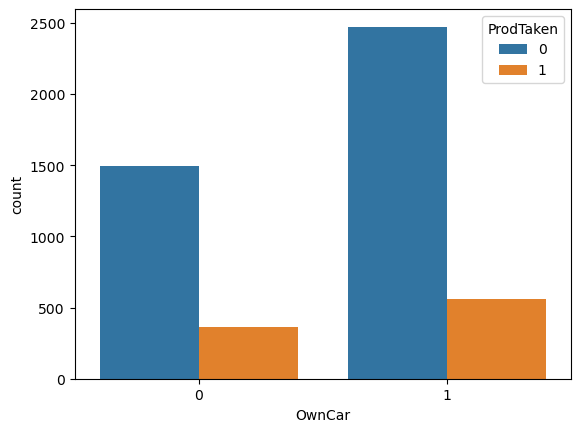

In [30]:
# Understanding customer interest based on OwnCar
sns.countplot(data = tdata, x = 'OwnCar', hue = 'ProdTaken')
plt.show()

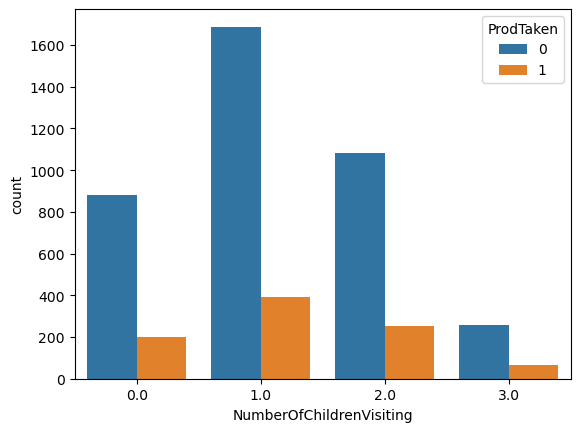

In [31]:
# Understanding customer interest based on NumberOfChildrenVisiting
sns.countplot(data = tdata, x = 'NumberOfChildrenVisiting', hue = 'ProdTaken')
plt.show()

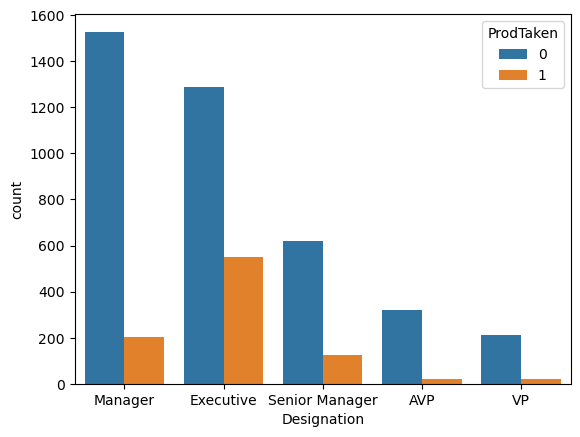

In [32]:
# Understanding customer interest based on Designation
sns.countplot(data = tdata, x = 'Designation', hue = 'ProdTaken')
plt.show()

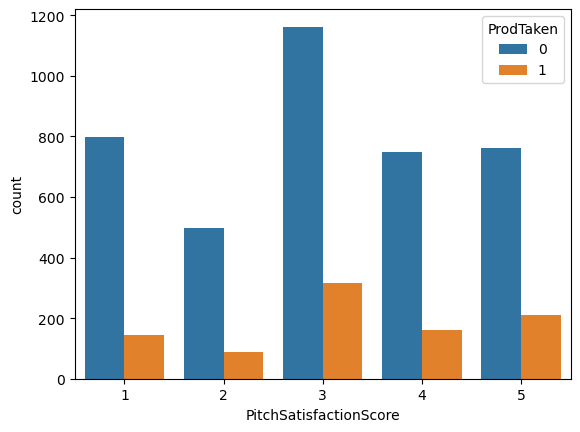

In [33]:
# Understanding customer interest based on PitchSatisfactionScore
sns.countplot(data = tdata, x = 'PitchSatisfactionScore', hue = 'ProdTaken')
plt.show()

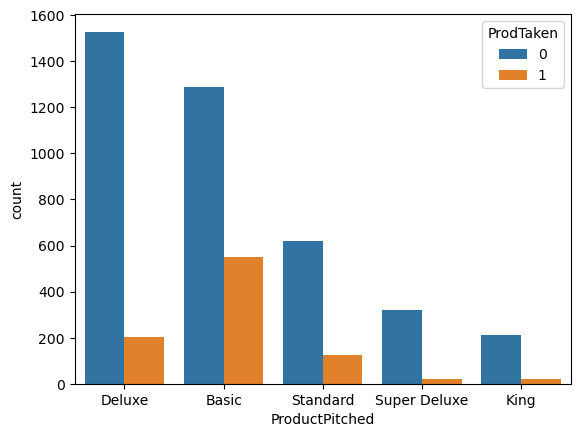

In [34]:
# Understanding customer interest based on ProductPitched
sns.countplot(data = tdata, x = 'ProductPitched', hue = 'ProdTaken')
plt.show()

# Basic has the most successes

In [170]:
# display pct of Basic success
pct_Basic = len(tdata[(tdata['ProductPitched'] == 'Basic') & (tdata['ProdTaken'] == 1) ]) / len(tdata[tdata['ProductPitched'] == 'Basic'])
pct_Deluxe = len(tdata[(tdata['ProductPitched'] == 'Deluxe') & (tdata['ProdTaken'] == 1) ]) / len(tdata[tdata['ProductPitched'] == 'Deluxe'])

print("Percent success for Basic package ", round(pct_Basic, 2) )
print("Percent success for Deluxe package ", round(pct_Deluxe, 2) )

Percent success for Basic package  0.3
Percent success for Deluxe package  0.12


In [159]:
tdata[tdata['ProdTaken'] == 1]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
14,200014,1,28.0,Self Enquiry,1,30.0,Salaried,Male,2,4.0,Basic,3.0,Single,6.0,1,2,0,0.0,Executive,17028.0
21,200021,1,NaN,Self Enquiry,3,15.0,Salaried,Male,2,4.0,Deluxe,5.0,Single,1.0,0,2,0,0.0,Manager,18407.0
24,200024,1,34.0,Self Enquiry,1,12.0,Small Business,Male,2,3.0,Basic,5.0,Single,3.0,0,2,1,1.0,Executive,17960.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


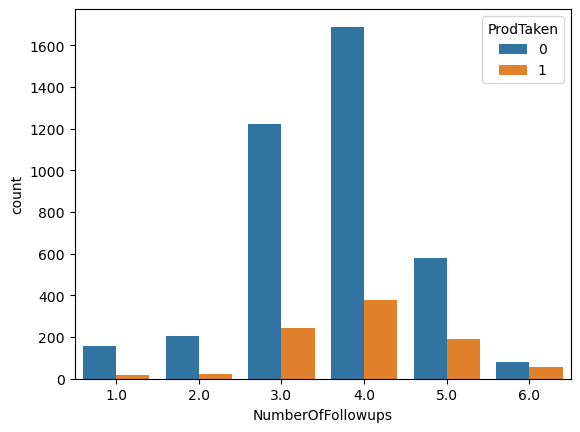

In [35]:
# Understanding customer interest based on NumberOfFollowups
sns.countplot(data = tdata, x = 'NumberOfFollowups', hue = 'ProdTaken')
plt.show()

**Questions**:

1. What is the distribution of the monthly income of customers? Are there any noticeable patterns or outliers in the distribution?
2. Which travel package is pitched the most by the salespersons to the customers?
3. How are the different customer attributes correlated to each other?
4. How does a customer's interest in purchasing the newly introduced travel package vary with their occupation?
5. How does a customer's interest in purchasing the newly introduced travel package vary with their marital status?

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

### Feature Engineering

In [36]:
# Feature engineering - Assign 'Female' to 'Fe Male'
tdata.loc[tdata['Gender'] == 'Fe Male', 'Gender']  = 'Female'

tdata.Gender.value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [37]:
# Feature engineering - set object data types to integers
for feature in tdata.columns:
    if tdata[feature].dtype == 'object':
        tdata[feature] = pd.Categorical(tdata[feature]) # use Categorical() to set strings to integers

# re-run info() to verify dtype
print(tdata.info())

# run head() to verify dataset
tdata.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   int64   
 2   Age                       4662 non-null   float64 
 3   TypeofContact             4863 non-null   category
 4   CityTier                  4888 non-null   int64   
 5   DurationOfPitch           4637 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   int64   
 9   NumberOfFollowups         4843 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4862 non-null   float64 
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4748 non-null   float6

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


### Drop CustomerID

In [38]:
# drop column CustomerID - it is an identifier and won't provide 
# predictive or classification value
if 'CustomerID' in tdata.columns:
    tdata.drop('CustomerID', axis = 1, inplace = True)
    
# validate with head()
tdata.head(5)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


### OneHot Encoding

In [39]:
# Set Up oneHotCols df for Categorical Variables
oneHotCols = ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 
             'MaritalStatus', 'Designation']
    
# run get_dummies to create dummy variables for categorical variables
tdata = pd.get_dummies(tdata, columns = oneHotCols)
tdata.head(10)

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,...,ProductPitched_Super Deluxe,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,1,41.0,3,6.0,3,3.0,3.0,1.0,1,2,...,False,False,False,True,False,False,False,True,False,False
1,0,49.0,1,14.0,3,4.0,4.0,2.0,0,3,...,False,True,False,False,False,False,False,True,False,False
2,1,37.0,1,8.0,3,4.0,3.0,7.0,1,3,...,False,False,False,True,False,False,True,False,False,False
3,0,33.0,1,9.0,2,3.0,3.0,2.0,1,5,...,False,True,False,False,False,False,True,False,False,False
4,0,NaN,1,8.0,2,3.0,4.0,1.0,0,5,...,False,True,False,False,False,False,True,False,False,False
5,0,32.0,1,8.0,3,3.0,3.0,1.0,0,5,...,False,False,False,True,False,False,True,False,False,False
6,0,59.0,1,9.0,2,2.0,5.0,5.0,1,2,...,False,True,False,False,False,False,True,False,False,False
7,0,30.0,1,30.0,3,3.0,3.0,2.0,0,2,...,False,False,True,False,False,False,True,False,False,False
8,0,38.0,1,29.0,2,4.0,3.0,1.0,0,3,...,False,False,False,False,True,False,False,False,True,False
9,0,36.0,1,33.0,3,3.0,3.0,7.0,0,3,...,False,True,False,False,False,False,False,True,False,False


### Missing Value Treatment - Data Imputation

In [40]:
# data imputation - re run isna().sum() to view variables that require imputation
print(tdata.isna().sum())

# collect columns that are missing data
missingData = ['Age', 'DurationOfPitch', 'NumberOfFollowups',
              'PreferredPropertyStar', 'NumberOfTrips', 
              'NumberOfChildrenVisiting', 'MonthlyIncome']

# re-run describe to view median and mean
print(tdata[missingData].describe().T)

# impute data using median
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')

# run imputer
tdata[missingData] = imputer.fit_transform(tdata[missingData])

# re-run tdata.info() to determine if data is missing
# and that we have all rows
print(tdata.info())

ProdTaken                          0
Age                              226
CityTier                           0
DurationOfPitch                  251
NumberOfPersonVisiting             0
NumberOfFollowups                 45
PreferredPropertyStar             26
NumberOfTrips                    140
Passport                           0
PitchSatisfactionScore             0
OwnCar                             0
NumberOfChildrenVisiting          66
MonthlyIncome                    233
TypeofContact_Company Invited      0
TypeofContact_Self Enquiry         0
Occupation_Free Lancer             0
Occupation_Large Business          0
Occupation_Salaried                0
Occupation_Small Business          0
Gender_Female                      0
Gender_Male                        0
ProductPitched_Basic               0
ProductPitched_Deluxe              0
ProductPitched_King                0
ProductPitched_Standard            0
ProductPitched_Super Deluxe        0
MaritalStatus_Divorced             0
M

### Create X to store features and y to store dependent variable

In [41]:
# drop ProdTaken - dependent variable store in X
# store features in y
X = tdata.drop('ProdTaken', axis = 1)
y = tdata.pop('ProdTaken')

### Running Train Test Split w/ Stratify

In [42]:
# from previous analysis ProdTaken is imbalanced, run stratify
# test_size = 0.30
# random_state = 1
# stratify = y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,
                                                   random_state = 1,
                                                   stratify = y)

In [43]:
X_train

,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,...,ProductPitched_Super Deluxe,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
3234,34.0,1,12.0,3,5.0,3.0,6.0,0,3,0,...,False,False,True,False,False,False,False,False,True,False
657,29.0,1,13.0,3,4.0,3.0,7.0,0,5,1,...,False,False,True,False,False,False,True,False,False,False
150,40.0,1,32.0,2,3.0,4.0,2.0,0,2,1,...,False,False,True,False,False,False,False,True,False,False
2745,19.0,3,13.0,4,5.0,3.0,3.0,0,2,1,...,False,False,False,True,False,False,True,False,False,False
2567,52.0,1,13.0,3,4.0,3.0,3.0,0,5,1,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,34.0,3,13.0,3,3.0,3.0,1.0,0,5,1,...,False,False,False,True,False,False,False,True,False,False
2926,32.0,3,20.0,3,4.0,5.0,4.0,0,2,0,...,False,False,True,False,False,False,False,True,False,False
3021,38.0,1,17.0,3,4.0,5.0,2.0,1,3,1,...,False,False,True,False,False,False,True,False,False,False
1682,27.0,3,26.0,2,3.0,3.0,2.0,0,1,1,...,False,False,False,False,True,False,False,True,False,False


## Model Building

### Model Evaluation Criterion

* Run confusion matrix to understand counts of True Positives
* Run Metrics to capture accuracy against train and test
* Run Metrics to capture recall against train and test
* Run Metrics to capture precision against train and test
* Run Metrics to capture F1 against train and test

In [118]:
# Create function that can be run against each algorithm and subsequent model
# to evaluate Accuracy, recall, precision, F1
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,printScores=True):
    '''
    model : classifier to predict values of X
    printScores : will print all model eval scores, default is True
    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = round(model.score(X_train,y_train), 2)
    test_acc = round(model.score(X_test,y_test), 2)
    
    train_recall = round(metrics.recall_score(y_train,pred_train), 2)
    test_recall = round(metrics.recall_score(y_test,pred_test), 2)
    
    train_precision = round(metrics.precision_score(y_train,pred_train), 2)
    test_precision = round(metrics.precision_score(y_test,pred_test), 2)
    
    train_f1 = round(metrics.f1_score(y_train, pred_train), 2)
    test_f1 = round(metrics.f1_score(y_test, pred_test), 2)
    
    score_list.extend((train_acc,test_acc,train_recall,
                       test_recall,train_precision,test_precision,
                      train_f1, test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if printScores == True: 
        print("Accuracy on training set : ",round(model.score(X_train,y_train), 2))
        print("Accuracy on test set : ",round(model.score(X_test,y_test), 2))
        print("Recall on training set : ",round(metrics.recall_score(y_train,pred_train), 2))
        print("Recall on test set : ",round(metrics.recall_score(y_test,pred_test), 2))
        print("Precision on training set : ",round(metrics.precision_score(y_train,pred_train), 2))
        print("Precision on test set : ",round(metrics.precision_score(y_test,pred_test), 2))
        print("F1 on training set : ",round(metrics.f1_score(y_train,pred_train), 2))
        print("F1 on test set : ",round(metrics.f1_score(y_test,pred_test), 2))
        
    
    return score_list # returning the list with train and test scores

In [45]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth, used to compare against y_predict
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Model Building: Decision Tree

In [46]:
# run decision tree with default values random_state = 1
dtree = DecisionTreeClassifier(random_state = 1)
dtree.fit(X_train, y_train)

get_metrics_score(dtree)

Accuracy on training set :  1.0
Accuracy on test set :  0.88
Recall on training set :  1.0
Recall on test set :  0.67
Precision on training set :  1.0
Precision on test set :  0.69
F1 on training set :  1.0
F1 on test set :  0.68


[1.0, 0.88, 1.0, 0.67, 1.0, 0.69]

ProdTaken
0    1191
1     276
Name: count, dtype: int64

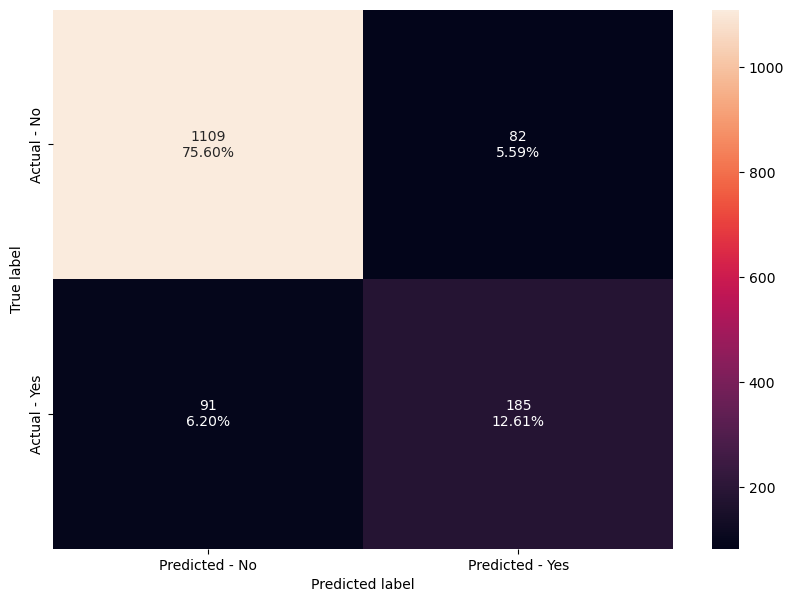

In [47]:
# run make_confusion_matrix to view count of True Positives
make_confusion_matrix(dtree, y_test)

# run value_counts to view as guide
y_test.value_counts()

### Model Improvement: Decision Tree

In [60]:
# run gridsearchcv to identify the optimized parameters
dt_estimator_tuned = DecisionTreeClassifier(random_state = 1)

# Grid of parameters to choose from
parameters = { 'max_depth': [5, 10, 15, None],
             'splitter': ['best', 'random'],
             'criterion': ['gini', 'entropy']
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dt_estimator_tuned, parameters, scoring = acc_scorer, cv = 5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dt_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
dt_estimator_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=1, splitter='random')

In [61]:
# capture metrics for the tuned Decision Tree
get_metrics_score(dt_estimator_tuned)

Accuracy on training set :  1.0
Accuracy on test set :  0.9
Recall on training set :  0.99
Recall on test set :  0.75
Precision on training set :  1.0
Precision on test set :  0.72
F1 on training set :  0.99
F1 on test set :  0.73


[1.0, 0.9, 0.99, 0.75, 1.0, 0.72]

ProdTaken
0    1191
1     276
Name: count, dtype: int64

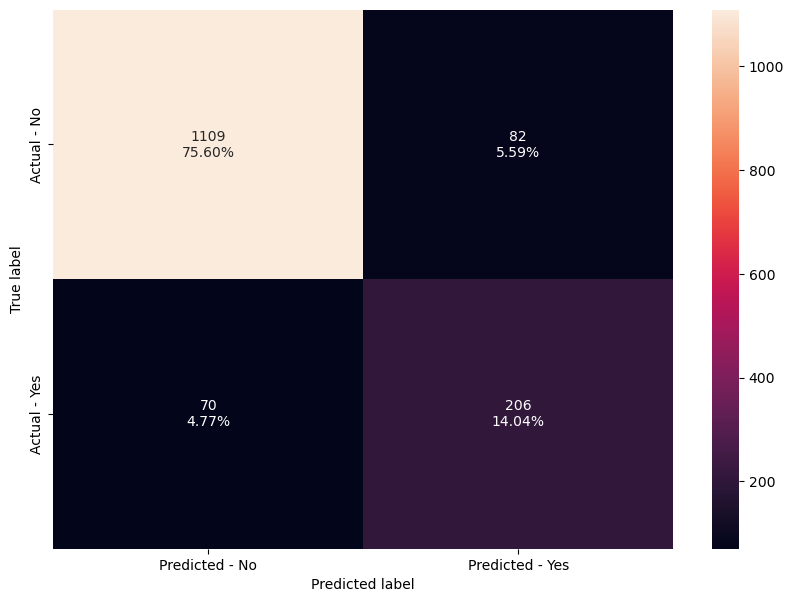

In [62]:
# run make_confusion_matrix to view count of True Positives
make_confusion_matrix(dt_estimator_tuned, y_test)

# run value_counts to view as guide
y_test.value_counts()

# improvement of 20 True Positives over Decision Tree with default values

### Model Building: Random Forest

In [53]:
# train random forest classifier
rf_estimator = RandomForestClassifier(random_state = 1) # run with and without balanced
rf_estimator.fit(X_train, y_train)

# running with class_weight = 'balanced' under performed without

RandomForestClassifier(random_state=1)

In [63]:
# capture metrics for Random Forest estimator
get_metrics_score(rf_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.92
Recall on training set :  1.0
Recall on test set :  0.61
Precision on training set :  1.0
Precision on test set :  0.93
F1 on training set :  1.0
F1 on test set :  0.74


[1.0, 0.92, 1.0, 0.61, 1.0, 0.93]

ProdTaken
0    1191
1     276
Name: count, dtype: int64

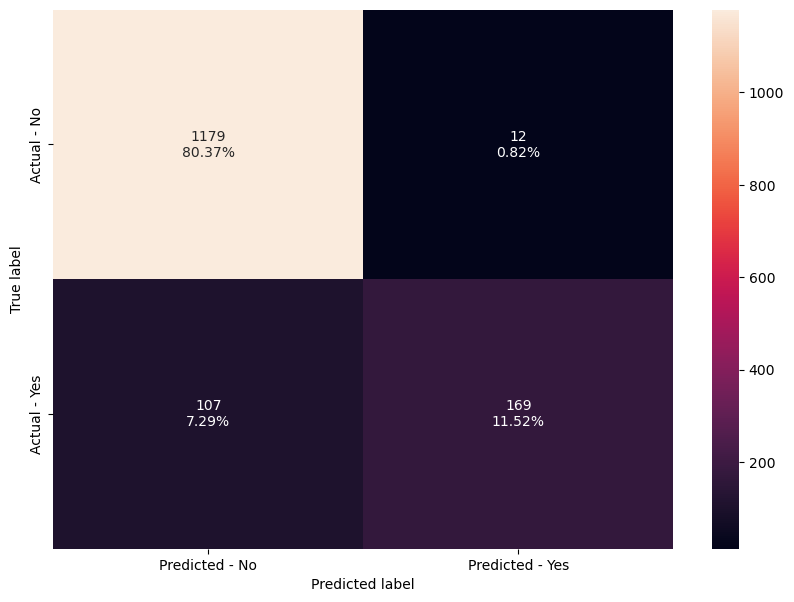

In [64]:
# run make_confusion_matrix to view count of True Positives
make_confusion_matrix(rf_estimator, y_test)

# run value_counts to view as guide
y_test.value_counts()

# improvement of 20 True Positives over Decision Tree with default values

### Model Improvement: Random Forest

In [56]:
# tune random forest estimator
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {"n_estimators": [10,30,50,70],
              "min_samples_split": [2, 5,7],
              "max_samples": np.arange(0.3, 0.7, 0.1), 
              "max_features": np.arange(0.2, 0.7, 0.1)
    
    
             } #"max_samples": np.arange(0.3, 0.7, 0.1),, "max_features": np.arange(0.2, 0.7, 0.1),

# set scorer to optimize for - recall
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_


# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=0.6000000000000001,
                       max_samples=0.6000000000000001, n_estimators=70,
                       random_state=1)

In [65]:
# capture metrics for tuned random forest estimator
get_metrics_score(rf_estimator_tuned)

Accuracy on training set :  0.99
Accuracy on test set :  0.91
Recall on training set :  0.97
Recall on test set :  0.55
Precision on training set :  1.0
Precision on test set :  0.92
F1 on training set :  0.98
F1 on test set :  0.69


[0.99, 0.91, 0.97, 0.55, 1.0, 0.92]

ProdTaken
0    1191
1     276
Name: count, dtype: int64

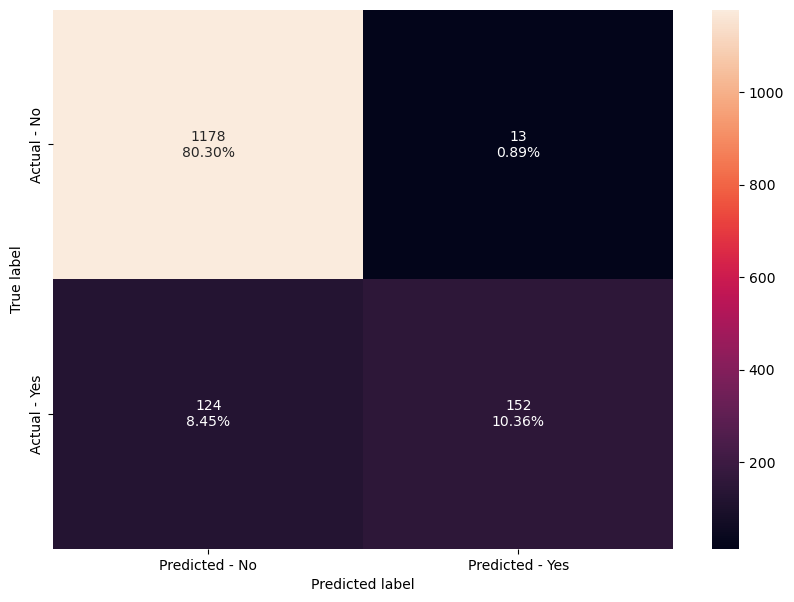

In [66]:
# run make_confusion_matrix to view count of True Positives
make_confusion_matrix(rf_estimator_tuned, y_test)

# run value_counts to view as guide
y_test.value_counts()

# improvement of 20 True Positives over Decision Tree with default values

### Model Building: Bagging

In [67]:
# train bagging with default values
bag_estimator = BaggingClassifier(random_state = 1)
bag_estimator.fit(X_train, y_train)

BaggingClassifier(random_state=1)

In [68]:
# capture metrics for bagging estimator
get_metrics_score(bag_estimator)

Accuracy on training set :  0.99
Accuracy on test set :  0.91
Recall on training set :  0.97
Recall on test set :  0.6
Precision on training set :  1.0
Precision on test set :  0.87
F1 on training set :  0.99
F1 on test set :  0.71


[0.99, 0.91, 0.97, 0.6, 1.0, 0.87]

ProdTaken
0    1191
1     276
Name: count, dtype: int64

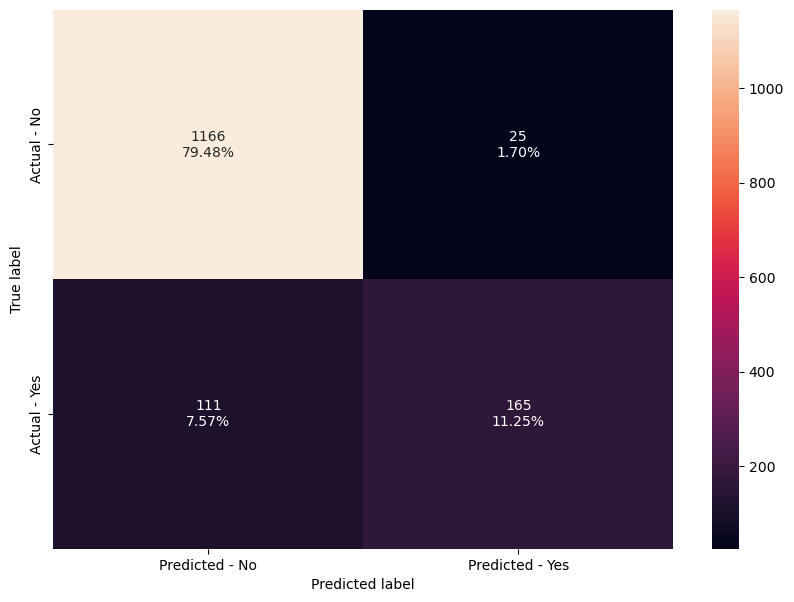

In [69]:
# run make_confusion_matrix to view count of True Positives
make_confusion_matrix(bag_estimator, y_test)

# run value_counts to view as guide
y_test.value_counts()

# improvement of 20 True Positives over Decision Tree with default values

### Model Improvement: Bagging 

In [70]:
# run gridsearchcv to tune bagging estimator
bag_estimator_tuned = BaggingClassifier(DecisionTreeClassifier(), random_state = 1)

# create parameters to choose from
parameters = {
    'max_samples': [0.7, 0.8, 0.9, 1],
    'max_features': [0.7, 0.8, 0.9, 1],
    'n_estimators': [10, 20, 30, 40, 50]
}

# set the scorer to optimize for
acc_scorer = metrics.make_scorer(metrics.recall_score)

# run grid search
grid_obj = GridSearchCV(bag_estimator_tuned, parameters,
                       scoring = acc_scorer, cv = 5)
grid_obj = grid_obj.fit(X_train, y_train)

# set clf to the best combination of parameters
bag_estimator_tuned = grid_obj.best_estimator_

# fit the best algorith to the data
bag_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_features=0.9,
                  max_samples=0.9, n_estimators=50, random_state=1)

In [71]:
# capture metrics for tuned bagging estimator
get_metrics_score(bag_estimator_tuned)

Accuracy on training set :  1.0
Accuracy on test set :  0.92
Recall on training set :  1.0
Recall on test set :  0.64
Precision on training set :  1.0
Precision on test set :  0.93
F1 on training set :  1.0
F1 on test set :  0.76


[1.0, 0.92, 1.0, 0.64, 1.0, 0.93]

ProdTaken
0    1191
1     276
Name: count, dtype: int64

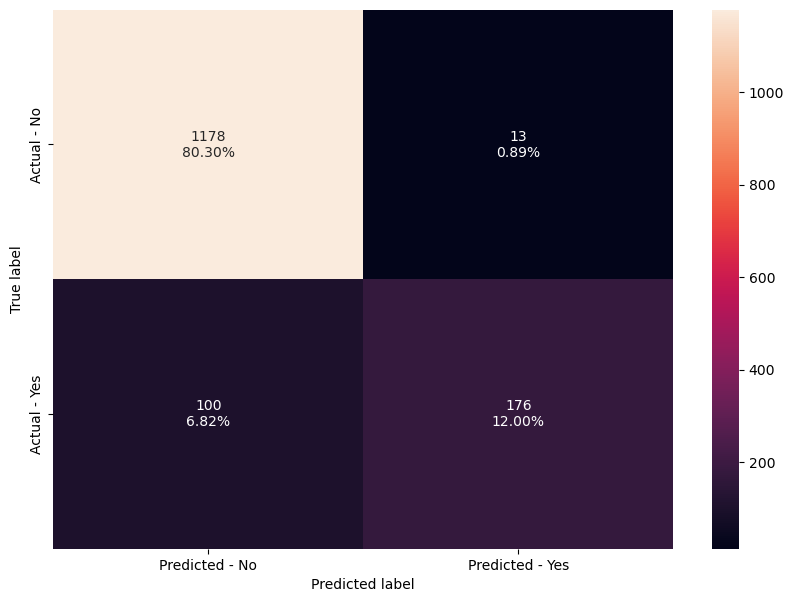

In [72]:
# run make_confusion_matrix to view count of True Positives
make_confusion_matrix(bag_estimator_tuned, y_test)

# run value_counts to view as guide
y_test.value_counts()

# improvement of 20 True Positives over Decision Tree with default values

### Model Building: AdaBoost 

In [73]:
# train adaboost estimator
ada_estimator = AdaBoostClassifier(random_state = 1)
ada_estimator.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

In [74]:
# capture metrics for adaboostclassifier
get_metrics_score(ada_estimator)

Accuracy on training set :  0.84
Accuracy on test set :  0.85
Recall on training set :  0.32
Recall on test set :  0.33
Precision on training set :  0.69
Precision on test set :  0.73
F1 on training set :  0.44
F1 on test set :  0.45


[0.84, 0.85, 0.32, 0.33, 0.69, 0.73]

ProdTaken
0    1191
1     276
Name: count, dtype: int64

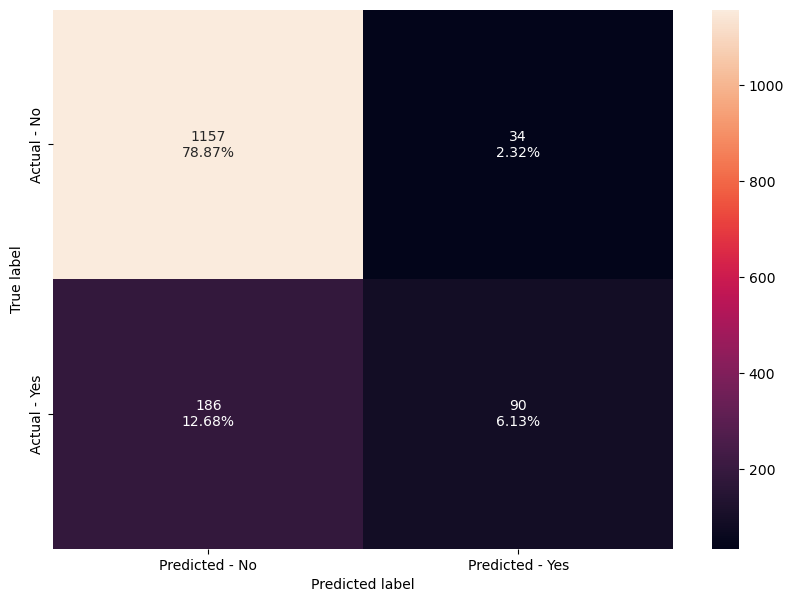

In [75]:
# run make_confusion_matrix to view count of True Positives
make_confusion_matrix(ada_estimator, y_test)

# run value_counts to view as guide
y_test.value_counts()

# improvement of 20 True Positives over Decision Tree with default values

### Model Improvement: AdaBoost

In [76]:
# create base estimator to be tuned
ada_estimator_tuned = AdaBoostClassifier(random_state=1)

# set parameters to run in gridsearchcv
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1),DecisionTreeClassifier(max_depth=2, random_state=1),DecisionTreeClassifier(max_depth=3, random_state=1)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# set scorer to optimize for
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(ada_estimator_tuned, parameters, scoring=acc_scorer,cv=4)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ada_estimator_tuned = grid_obj.best_estimator_

# fit the tuned estimator with tuned algorithm to the data
ada_estimator_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=1.6, n_estimators=90, random_state=1)

In [77]:
# capture metrics for tuned adaboost classifier
get_metrics_score(ada_estimator_tuned)

Accuracy on training set :  0.98
Accuracy on test set :  0.86
Recall on training set :  0.93
Recall on test set :  0.62
Precision on training set :  0.97
Precision on test set :  0.64
F1 on training set :  0.95
F1 on test set :  0.63


[0.98, 0.86, 0.93, 0.62, 0.97, 0.64]

ProdTaken
0    1191
1     276
Name: count, dtype: int64

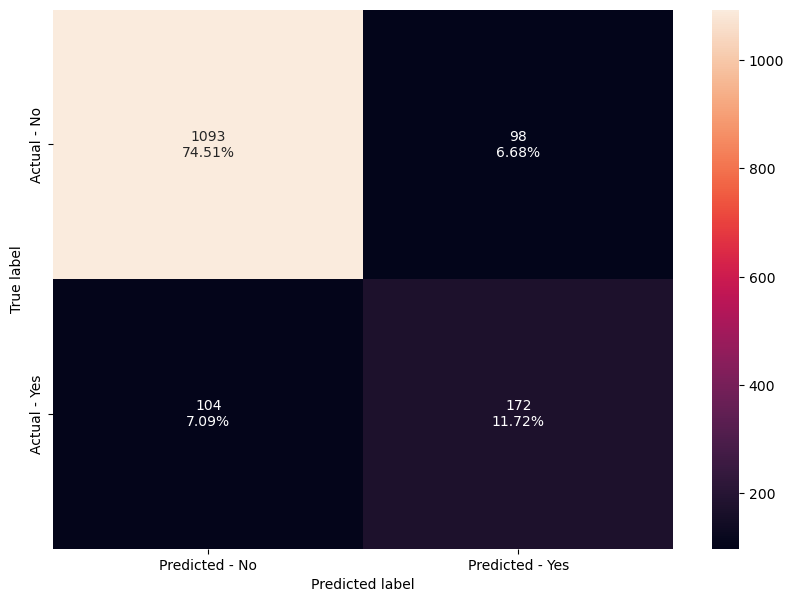

In [78]:
# run make_confusion_matrix to view count of True Positives
make_confusion_matrix(ada_estimator_tuned, y_test)

# run value_counts to view as guide
y_test.value_counts()

# improvement of 20 True Positives over Decision Tree with default values

### Model Building: Gradient Boosting

In [79]:
# initialize gradient boost classifier with adaboost
gradbc_init = GradientBoostingClassifier(init = AdaBoostClassifier(random_state = 1), 
                                        random_state = 1)
gradbc_init.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [80]:
# capture metrics for gradient boosting classifier
get_metrics_score(gradbc_init)

Accuracy on training set :  0.89
Accuracy on test set :  0.87
Recall on training set :  0.45
Recall on test set :  0.4
Precision on training set :  0.9
Precision on test set :  0.79
F1 on training set :  0.6
F1 on test set :  0.53


[0.89, 0.87, 0.45, 0.4, 0.9, 0.79]

ProdTaken
0    1191
1     276
Name: count, dtype: int64

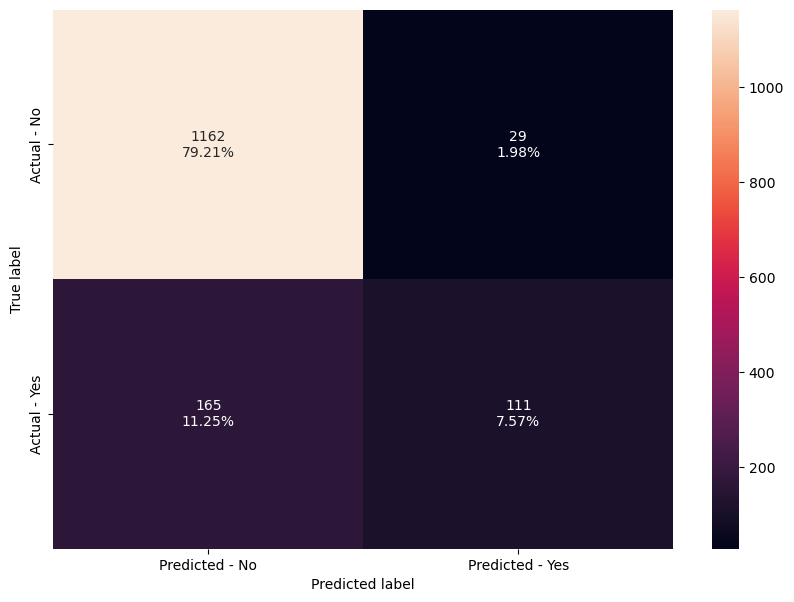

In [81]:
# run make_confusion_matrix to view count of True Positives
make_confusion_matrix(gradbc_init, y_test)

# run value_counts to view as guide
y_test.value_counts()

# improvement of 20 True Positives over Decision Tree with default values

### Model Improvement: Gradient Boosting


In [82]:
# select type of estimator
gradbc_tuned = GradientBoostingClassifier(init = AdaBoostClassifier(random_state = 1),
                                         random_state = 1)

# create grid parameters
parameters = {
    "n_estimators": [100, 150, 200, 250],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1]
}

# select scorer to optimize for
acc_scorer = metrics.make_scorer(metrics.recall_score)

# run gridsearchcv
grid_obj = GridSearchCV(gradbc_tuned, parameters, scoring = acc_scorer, cv = 4)
grid_obj = grid_obj.fit(X_train, y_train)

# set clf to the parameters optimized for recall
gradbc_tuned = grid_obj.best_estimator_

# fit the optimized algorithm
gradbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=250, random_state=1,
                           subsample=0.8)

In [83]:
# capture metrics for tuned gradient boosting classifier
get_metrics_score(gradbc_tuned)

Accuracy on training set :  0.92
Accuracy on test set :  0.88
Recall on training set :  0.62
Recall on test set :  0.5
Precision on training set :  0.93
Precision on test set :  0.81
F1 on training set :  0.74
F1 on test set :  0.62


[0.92, 0.88, 0.62, 0.5, 0.93, 0.81]

ProdTaken
0    1191
1     276
Name: count, dtype: int64

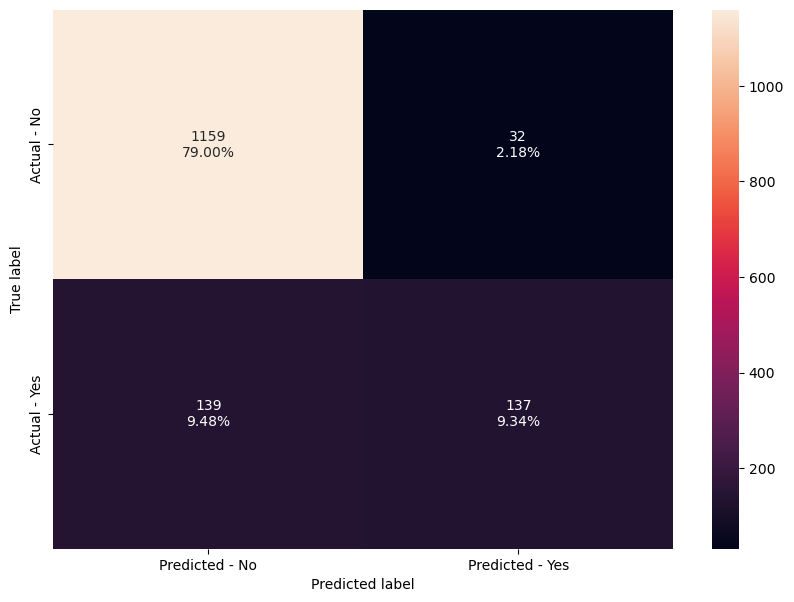

In [84]:
# run make_confusion_matrix to view count of True Positives
make_confusion_matrix(gradbc_tuned, y_test)

# run value_counts to view as guide
y_test.value_counts()

# improvement of 20 True Positives over Decision Tree with default values

### Model Building: XGBoost

**Please note XGBoost can take a significantly longer time to run, so if you have time complexity issues then you can avoid tuning XGBoost, and there will no points deducted if XG-boost is not performed**

In [85]:
# run xgboost with default parameters
xgboost = XGBClassifier(random_state = 1, eval_metric = 'logloss')
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

In [86]:
# capture metrics for XGBoost Classifier
get_metrics_score(xgboost)

Accuracy on training set :  1.0
Accuracy on test set :  0.93
Recall on training set :  1.0
Recall on test set :  0.7
Precision on training set :  1.0
Precision on test set :  0.89
F1 on training set :  1.0
F1 on test set :  0.78


[1.0, 0.93, 1.0, 0.7, 1.0, 0.89]

ProdTaken
0    1191
1     276
Name: count, dtype: int64

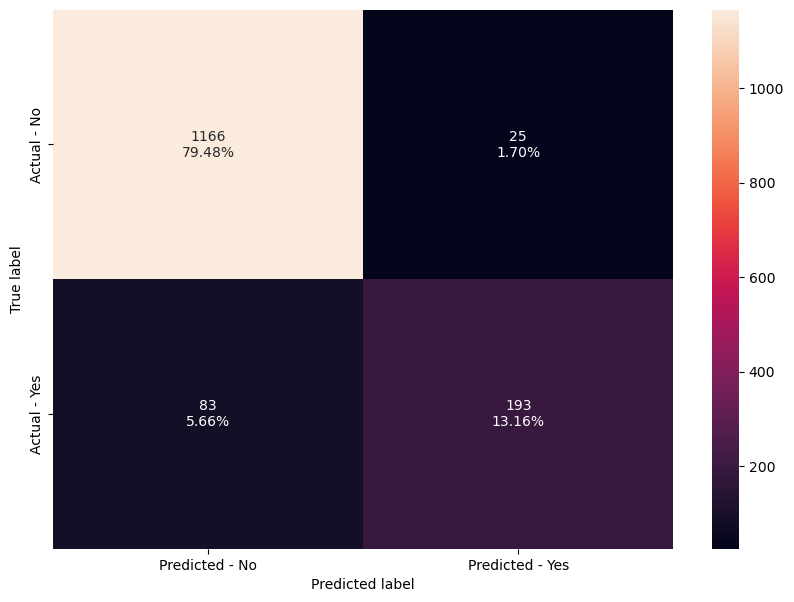

In [87]:
# run make_confusion_matrix to view count of True Positives
make_confusion_matrix(xgboost, y_test)

# run value_counts to view as guide
y_test.value_counts()

# improvement of 20 True Positives over Decision Tree with default values

### Model Improvement: XGBoost


In [88]:
# select initial estimator
xgboost_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# select grid parameters
parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,1,2,5],
   # "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
  #  "colsample_bytree":[0.5,0.7,0.9,1],
   # "colsample_bylevel":[0.5,0.7,0.9,1]
}

# select recall as score to optimize for
acc_scorer = metrics.make_scorer(metrics.recall_score)

# run gridsearchcv
grid_obj = GridSearchCV(xgboost_tuned, parameters,scoring=acc_scorer,cv=3)
grid_obj = grid_obj.fit(X_train, y_train)

# select the parameters for the optimized estimator
xgboost_tuned = grid_obj.best_estimator_

# fit the optimized algorithm to the training data
xgboost_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=30, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

In [89]:
# capture metrics for tuned XGBoost Classifier
get_metrics_score(xgboost_tuned)

Accuracy on training set :  0.94
Accuracy on test set :  0.87
Recall on training set :  0.98
Recall on test set :  0.81
Precision on training set :  0.77
Precision on test set :  0.61
F1 on training set :  0.86
F1 on test set :  0.7


[0.94, 0.87, 0.98, 0.81, 0.77, 0.61]

ProdTaken
0    1191
1     276
Name: count, dtype: int64

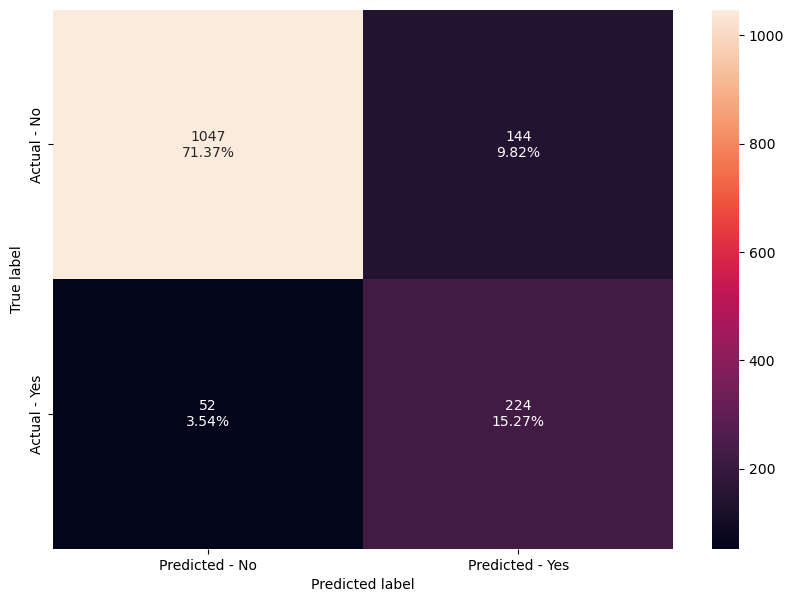

In [90]:
# run make_confusion_matrix to view count of True Positives
make_confusion_matrix(xgboost_tuned, y_test)

# run value_counts to view as guide
y_test.value_counts()

# improvement of 20 True Positives over Decision Tree with default values

### Model Building: Stacking

In [121]:
# Decision Tree Classifier and Gradient Boosting set as base estimators in variable models
# final estimator set as XGBClassifier
# Use previously tuned models as base estimators
# Review performance/recall or use all previously tuned models
models = [('dtc',dt_estimator_tuned),
           ('abc', ada_estimator_tuned),
           ('bc', bag_estimator_tuned)]

# set final_estimator to XGBClassifer() with default values
final_estimator = XGBClassifier(random_state = 1)
stack_estimator = StackingClassifier(estimators = models, final_estimator = final_estimator)

# Fit the model to training data
stack_estimator.fit(X_train, y_train)

StackingClassifier(estimators=[('dtc',
                                DecisionTreeClassifier(max_depth=15,
                                                       random_state=1,
                                                       splitter='random')),
                               ('abc',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                                         random_state=1),
                                                   learning_rate=1.6,
                                                   n_estimators=90,
                                                   random_state=1)),
                               ('bc',
                                BaggingClassifier(estimator=DecisionTreeClassifier(),
                                                  max_features=0.9,
                                                  max_samples=0.9,
                                                  n_esti...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=100, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None, random_state=1, ...))

In [122]:
# capture metrics for Stacking Classifier
get_metrics_score(stack_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.92
Recall on training set :  1.0
Recall on test set :  0.75
Precision on training set :  0.99
Precision on test set :  0.8
F1 on training set :  0.99
F1 on test set :  0.78


[1.0, 0.92, 1.0, 0.75, 0.99, 0.8, 0.99, 0.78]

ProdTaken
0    1191
1     276
Name: count, dtype: int64

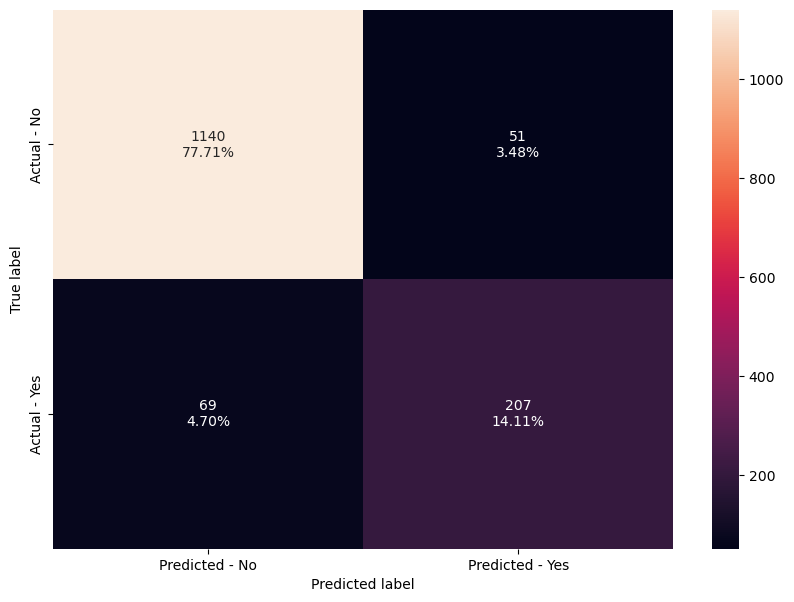

In [123]:
# run make_confusion_matrix to view count of True Positives
make_confusion_matrix(stack_estimator, y_test)

# run value_counts to view as guide
y_test.value_counts()

# improvement of 20 True Positives over Decision Tree with default values

### Model Improvement: Stacking


In [124]:
# select initial estimator
stack_estimator2 = StackingClassifier(estimators = models, 
                                    final_estimator = final_estimator)

# select grid parameters
parameters = {
    'abc__n_estimators': [10, 20, 30],
    'dtc__max_depth': [5, 10, 15, None],
    'dtc__splitter': ['best', 'random'],
   # 'dtc__criterion': ['gini', 'entropy'],
   # 'bc__n_estimators': [10, 20, 30],
   # 'final_estimator': [XGBClassifier(n_estimators = 30, gamma = 3),
   #                    XGBClassifier(n_estimators = 50, gamma = 2, learning_rate = 0.2)],
    'passthrough': [True, False]
}



# select recall as score to optimize for
acc_scorer = metrics.make_scorer(metrics.recall_score)

# run gridsearchcv
grid_obj = GridSearchCV(stack_estimator2, parameters,scoring=acc_scorer,cv=2)
grid_obj = grid_obj.fit(X_train, y_train)

# select the parameters for the optimized estimator
stack_estimator_tuned = grid_obj.best_estimator_

# fit the optimized algorithm to the training data
stack_estimator_tuned.fit(X_train, y_train)

StackingClassifier(estimators=[('dtc',
                                DecisionTreeClassifier(max_depth=10,
                                                       random_state=1,
                                                       splitter='random')),
                               ('abc',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                                         random_state=1),
                                                   learning_rate=1.6,
                                                   n_estimators=10,
                                                   random_state=1)),
                               ('bc',
                                BaggingClassifier(estimator=DecisionTreeClassifier(),
                                                  max_features=0.9,
                                                  max_samples=0.9,
                                                  n_esti...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=100, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None, random_state=1, ...),
                   passthrough=True)

In [125]:
# capture metrics for tuned Stacking Classifier
get_metrics_score(stack_estimator_tuned)

Accuracy on training set :  1.0
Accuracy on test set :  0.93
Recall on training set :  1.0
Recall on test set :  0.74
Precision on training set :  0.99
Precision on test set :  0.86
F1 on training set :  1.0
F1 on test set :  0.79


[1.0, 0.93, 1.0, 0.74, 0.99, 0.86, 1.0, 0.79]

ProdTaken
0    1191
1     276
Name: count, dtype: int64

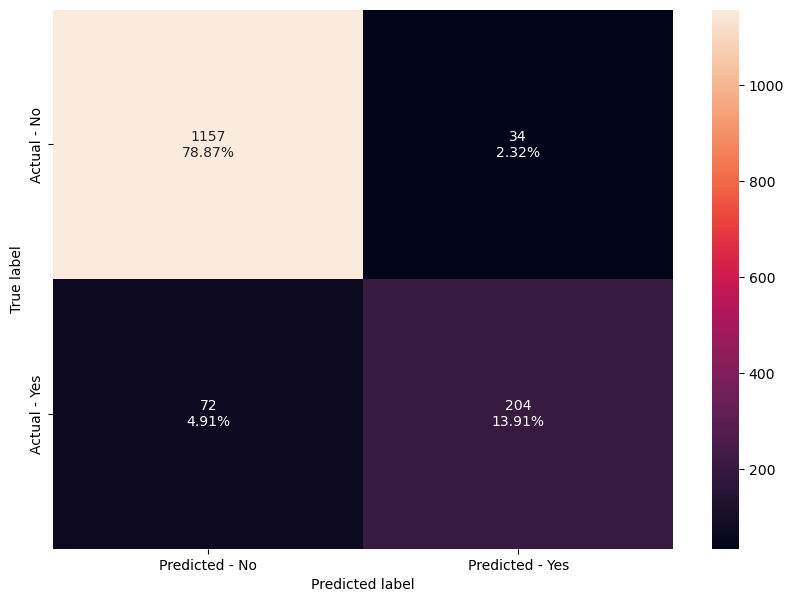

In [126]:
# run make_confusion_matrix to view count of True Positives
make_confusion_matrix(stack_estimator_tuned, y_test)

# run value_counts to view as guide
y_test.value_counts()

# improvement of 20 True Positives over Decision Tree with default values

## Model Comparison and Final Model Selection

In [127]:
# defining list of models
models = [dtree, dt_estimator_tuned,
         rf_estimator, rf_estimator_tuned,
         bag_estimator, bag_estimator_tuned,
         ada_estimator, ada_estimator_tuned,
         gradbc_init, gradbc_tuned,
         xgboost, xgboost_tuned,
         stack_estimator, stack_estimator_tuned]

# defining empty lists to add/append train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# looping through all the models to get the accuracy, recall, precision, and f1 scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [140]:
# create a dataframe that stores models and metric values
# 
comparison_frame = pd.DataFrame({'Model':['Decision Tree - Default','Decistion Tree Tuned', 
                                          'Random Forest - Default','Random Forest Tuned',
                                          'Bagging - Default','Bagging Tuned',
                                          'Adaboost - Default', 'Adaboost Tuned',
                                          'Gradient Boosting - Default', 'Gradient Boosting Tuned',
                                          'XGBoost - Default', 'XGBoost Tuned',
                                         'Stacking with Three models', 'Stacking Tuned'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                         'Train_F1':f1_train,'Test_F1':f1_test
                                }) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
0,Decision Tree - Default,1.00,0.88,1.00,0.67,1.00,0.69,1.00,0.68
1,Decistion Tree Tuned,1.00,0.90,0.99,0.75,1.00,0.72,0.99,0.73
2,Random Forest - Default,1.00,0.92,1.00,0.61,1.00,0.93,1.00,0.74
3,Random Forest Tuned,0.99,0.91,0.97,0.55,1.00,0.92,0.98,0.69
4,Bagging - Default,0.99,0.91,0.97,0.60,1.00,0.87,0.99,0.71
5,Bagging Tuned,1.00,0.92,1.00,0.64,1.00,0.93,1.00,0.76
6,Adaboost - Default,0.84,0.85,0.32,0.33,0.69,0.73,0.44,0.45
7,Adaboost Tuned,0.98,0.86,0.93,0.62,0.97,0.64,0.95,0.63
8,Gradient Boosting - Default,0.89,0.87,0.45,0.40,0.90,0.79,0.60,0.53
9,Gradient Boosting Tuned,0.92,0.88,0.62,0.50,0.93,0.81,0.74,0.62


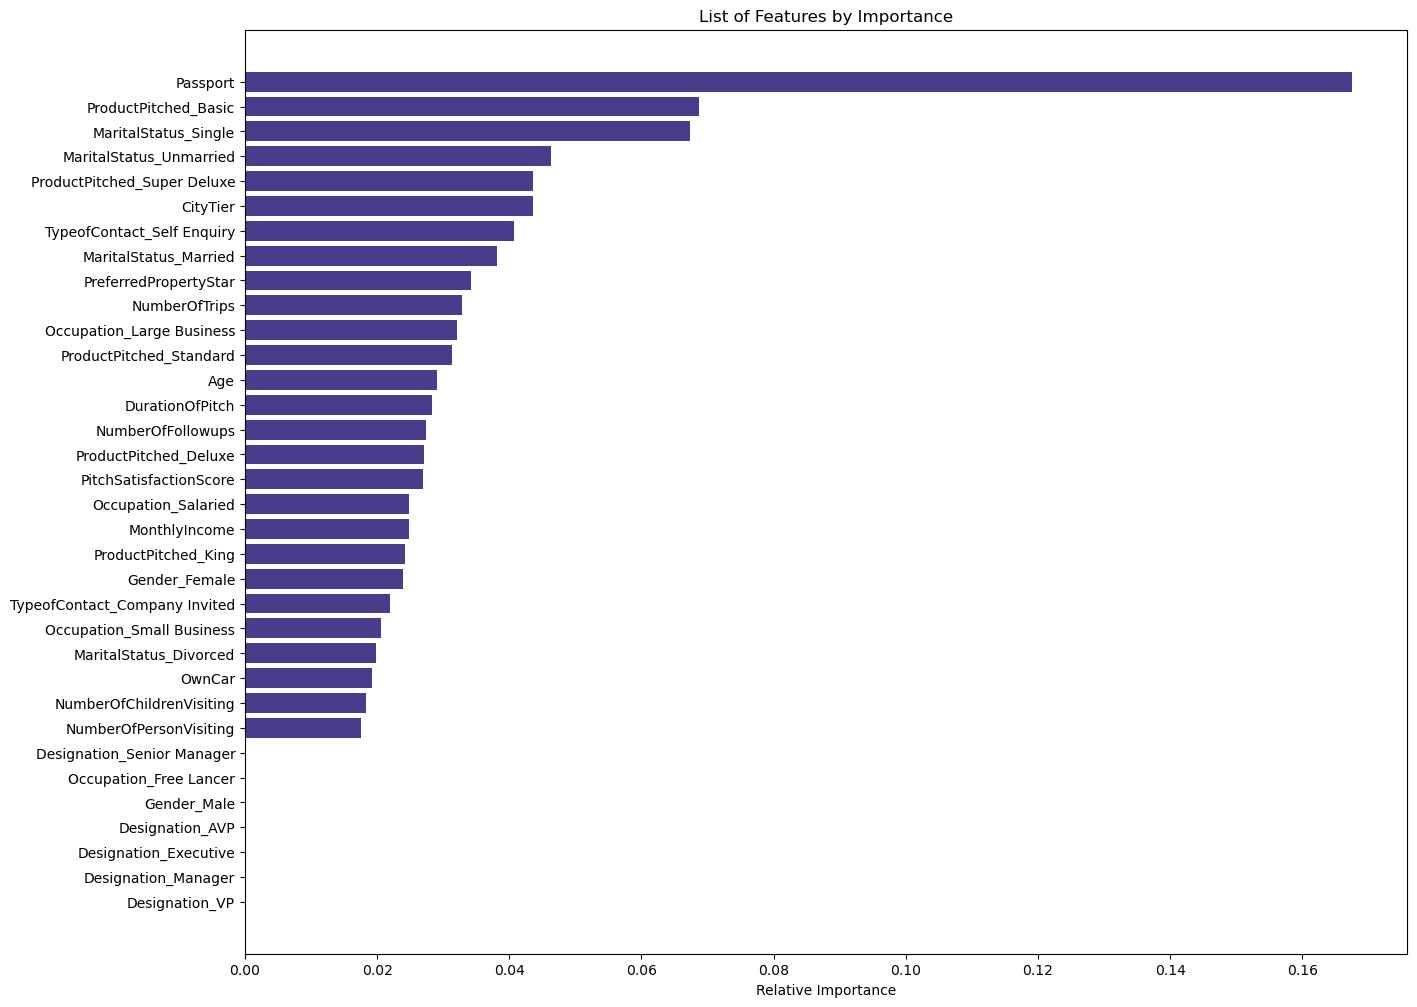

In [139]:
# understand importance of variables for Xgboost tuned model
# StackingClassifier doesn't have a feature_importances_ attribute
importances = xgboost_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(15,12))
plt.title('List of Features by Importance')
plt.barh(range(len(indices)), importances[indices], color='darkslateblue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Actionable Insights and Business Recommendations


**What recommedations would you suggest to the Visit with us company?**

#### Context
* The data set indicates 18.8% of Pitches have been successful in overall dataset
* The count of Deluxe packages in the data set misleads - 12% of Pitches for Deluxe packages led to Product Taken
* The Basic Package on the other hand has a 30% success rate when it is pitched.
* The List of Features by Importance from the Tuned XGBoost lists Basic Product Pitch as the second ranked by Relative Importance
* Montly Income has a right skewed distribution with a number of outliers
* The mean is 20,993 with two values at 98,678 and 95,000. Both are valid and have been included in model training for all algorithms
* Montly Income does not fall within the top 10 List of Features by Importance
* Duration of Pitch and Pitch Satisfaction Score do not have a correlation or relationship
* The Basic package was pitched the most. It was pitched 1842 times with a 30% success rate (ProdTaken == 1)
* In second place, the Deluxe package was pitched 1732 times with a success rate of 12%
* There aren't any strong correlations between data points
    * The strongest correlations are Age and Monthly Income and NumberOfChildrenVisting and NumberofPersonVisiting
* Occupation has some interesting data points
    * Salaried individuals have a success rate 17%. Occupation does vary slightly.
    * Small Businesses have a success rate of 18%
    * Large Business have a success rate of 26%, but there are fewer Large Businesses with 434 out of 4888
    * Freelancers have 100% success rate, but there are 2 freelancers in the entire data set
* Marital Status does impact whether an individual will select the product
    * Single people select a travel product 33% of the time
    * Divorced people select a travel product 13% of the time
    * Married people select a travel product 14% of the time
    * Unmarried people select a travel product 24% of the time


#### Recommendations
* Models are chosen for performance predicting True Positives
* Because we need to generate some recommendations, within the context of this exercise, a model that provides interpretable drivers of successful engagements with customers will be selected
* Optimize for recall. The tuned model for XGBoost algorithm performed the best with 0.81
* The stacking agorithms also perform well and have strong accuracy and f1 scores
* Note - the stacking algorithm doesn't have the same feature_importances_ attribute as does XGBoost. XGBoost will be leveraged in order to generate a list of important features

* The XGBoost indicates individuals with passports are most likely to select a travel package - and would be most likely to select the new package.
* There is no correlation between the duration of pitches and PitchSatisfactionScore

* Passport recommendations - number one feature by relative importance
    * A script for each engagement should determine early whether an individual has a passport or not
    * For individuals who reach out the service, request that these individuals fill out a form that asks whether they have a passport or not
    * Generate demographic data or pay for user data to understand whether individuals have passports or not. If individuals have passports, prioritize engaging with them over phone and email
    * Create targeted ads on social media for people who have passports or who are inferred to have passports

* Marital status recommendations
    * Single and Unmarried both appear in the top five features by relative importance
     * A script for each engagement should determine early whether an individual is single or unmarried
    * For individuals who reach out the service, request that these individuals fill out a form that asks their Marital Status. For individuals who are Single or Unmarried, prioritize engaging with them over phone and email
    * Generate demographic data or pay for user data to understand whether individuals have passports or not. If individuals have passports, reach out to them
    * Create targeted ads on social media for people who are single or unmarried
    
* Large Business recommendation
    * Extend partnerships or reduced rates to Large Businesses in larger City Tiers
    * Large Business have a ~10% greater success rate the other Occupation categories
 
* Self Inquirty recommendation
    * Self inquiry is number 7 in the list of features by relative importance
    * Create a form for Self Inquiring individuals to capture additional demographic detail
    * Send promotional emails and reduced rates to inidivuals who self inquire
 




___